In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.datasets import sunspots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

# Ігнорування попереджень
warnings.filterwarnings("ignore")

# Завантажуємо датасет Yearly Sunspots
data = sunspots.load_pandas().data
data.reset_index(drop=True, inplace=True)
data

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [5]:
# перевірка пропущених значень
print(data.isnull().sum())

YEAR           0
SUNACTIVITY    0
dtype: int64


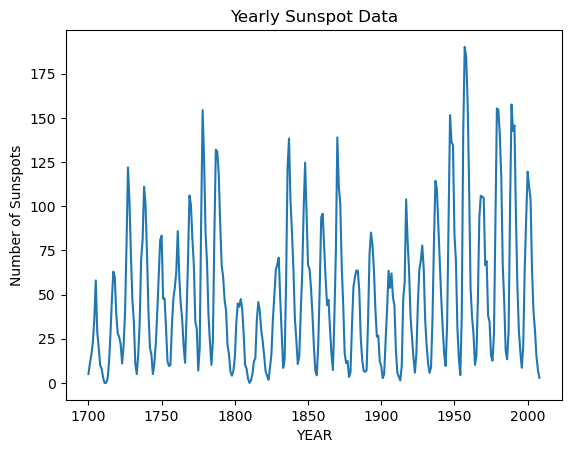

In [6]:
# вивід графіку датасету
plt.plot(data['YEAR'], data['SUNACTIVITY'])
plt.title('Yearly Sunspot Data')
plt.xlabel('YEAR')
plt.ylabel('Number of Sunspots')
plt.show()

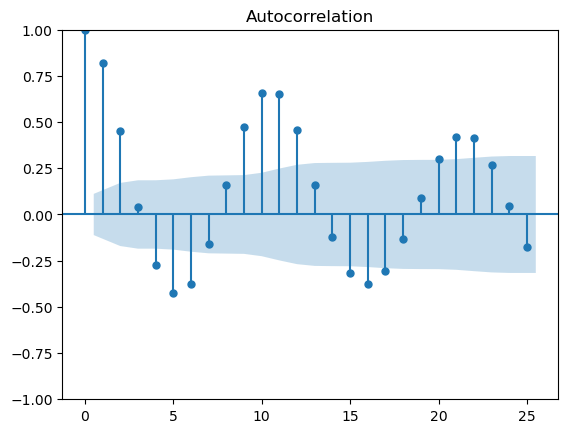

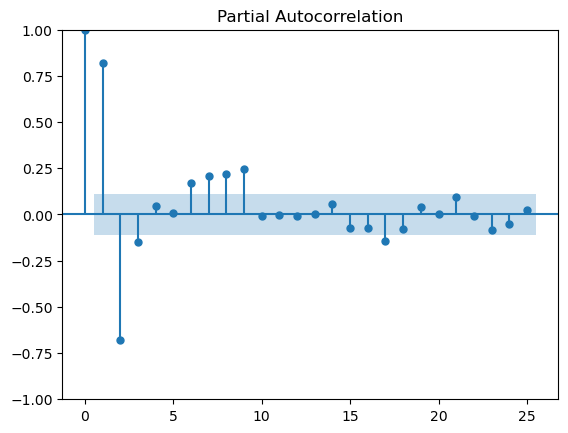

In [7]:
# перевірка стаціонарності
plot_acf(data['SUNACTIVITY'])
plot_pacf(data['SUNACTIVITY'], method='ywm')
plt.show()

In [8]:
# відокремлення сезонної складової
seasonal_diff = data['SUNACTIVITY'].diff(11).dropna()

In [9]:
# відокремлення трендової складової
trend_diff = seasonal_diff.diff().dropna()

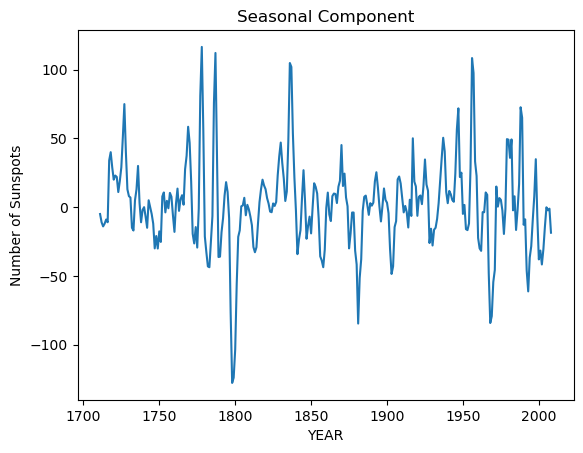

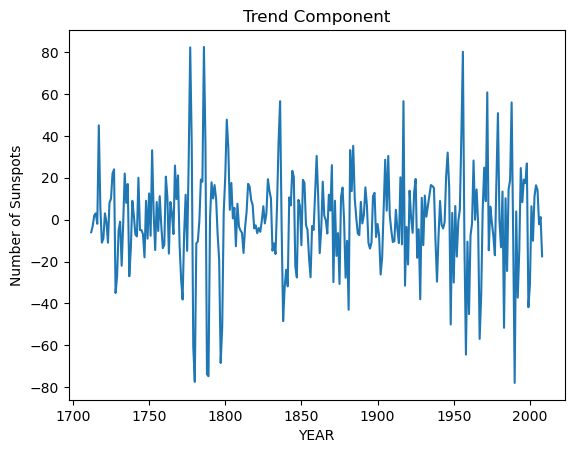

In [10]:
# вивід графіків відокремлених складових
plt.plot(data['YEAR'].iloc[11:], seasonal_diff)
plt.title('Seasonal Component')
plt.xlabel('YEAR')
plt.ylabel('Number of Sunspots')
plt.show()

plt.plot(data['YEAR'].iloc[12:], trend_diff)
plt.title('Trend Component')
plt.xlabel('YEAR')
plt.ylabel('Number of Sunspots')
plt.show()

2009   -12.201509
2010   -10.542736
2011   -12.010478
2012   -11.842596
2013   -11.634101
2014   -11.729841
2015   -11.736759
2016   -11.717517
2017   -11.722360
2018   -11.724259
2019   -11.722797
2020   -11.722920
2021   -11.723142
2022   -11.723050
2023   -11.723039
2024   -11.723059
2025   -11.723055
2026   -11.723052
2027   -11.723054
2028   -11.723054
2029   -11.723054
2030   -11.723054
Name: predicted_mean, dtype: float64


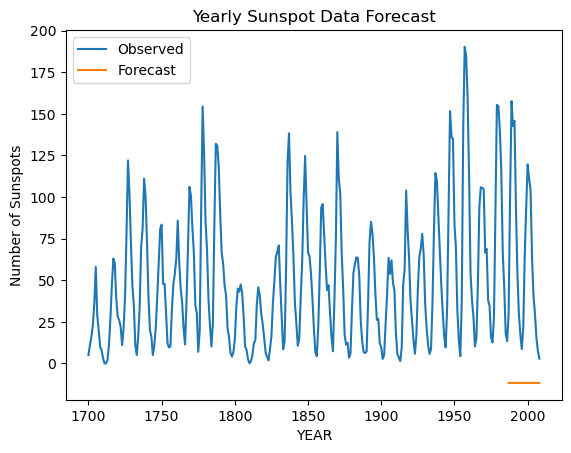

In [11]:
# Побудова моделі ARIMA
model = ARIMA(trend_diff, order=(2, 1, 0))
model_fit = model.fit()

# Прогноз на період 2009-2030 рр.
start = len(trend_diff)
end = start + 21
forecast = model_fit.predict(start=start, end=end)

# Виведення прогнозу
forecast.index = pd.RangeIndex(start=2009, stop=2031, step=1)
print(forecast)

# Перетворення індексу на підтримуваний формат
data.index = pd.RangeIndex(start=0, stop=len(data), step=1)

# Прогнозування на майбутні значення
start_index = len(data)
end_index = len(data) + 21
forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')

# Виведення прогнозу
plt.plot(data['YEAR'], data['SUNACTIVITY'], label='Observed')
plt.plot(data['YEAR'].iloc[287:], forecast, label='Forecast')
plt.title('Yearly Sunspot Data Forecast')
plt.xlabel('YEAR')
plt.ylabel('Number of Sunspots')
plt.legend()
plt.show()

